##  Solve the missing rows on the area-total_sq_mi column from california_cities.csv 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
df = pd.read_csv('C:/Users/samsc/Desktop/ADS-500B/Data_and_Code2/california_cities.csv' , header = 0, sep=',')

In [3]:
df

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,477,Yountville,38.403056,-122.362222,30.0,98.0,2933,1.531,1.531,0.000,3.966,3.966,0.000,0.00
478,478,Yreka,41.726667,-122.637500,787.0,2582.0,7765,10.053,9.980,0.073,26.036,25.847,0.188,0.72
479,479,YubaCity,39.134722,-121.626111,18.0,59.0,64925,14.656,14.578,0.078,37.959,37.758,0.201,0.53
480,480,Yucaipa,34.030278,-117.048611,798.0,2618.0,51367,27.893,27.888,0.005,72.244,72.231,0.013,0.02


# Redundant index columns how to fix: a

In [4]:
#loc method is used to slice and index dataframe by column labels
sub_df = df.loc[:,['city','elevation_ft', 'population_total', 'area_total_sq_mi']]
sub_df

,city,elevation_ft,population_total,area_total_sq_mi
0,Adelanto,2871.0,31765,56.027
1,AgouraHills,922.0,20330,7.822
2,Alameda,33.0,75467,22.960
3,Albany,43.0,18969,5.465
4,Alhambra,492.0,83089,7.632
...,...,...,...,...
477,Yountville,98.0,2933,1.531
478,Yreka,2582.0,7765,10.053
479,YubaCity,59.0,64925,14.656
480,Yucaipa,2618.0,51367,27.893


In [5]:
sub_df.isnull().sum() #count the number of missing rows by column

city                 0
elevation_ft        12
population_total     0
area_total_sq_mi     2
dtype: int64

In [6]:
sub_df[sub_df['area_total_sq_mi'].isnull()] #the two cities in the data set with missing total area square miles

,city,elevation_ft,population_total,area_total_sq_mi
163,Gridley,95.0,6593,NaN
335,RanchoMirage,272.0,17218,NaN


In [7]:
area_total_sq_mi = sub_df['area_total_sq_mi']
area_total_sq_mi

0      56.027
1       7.822
2      22.960
3       5.465
4       7.632
        ...  
477     1.531
478    10.053
479    14.656
480    27.893
481    40.015
Name: area_total_sq_mi, Length: 482, dtype: float64

In [8]:
area_total_sq_mi.isnull() #not what I wanted lol

0      False
1      False
2      False
3      False
4      False
       ...  
477    False
478    False
479    False
480    False
481    False
Name: area_total_sq_mi, Length: 482, dtype: bool

In [9]:
area_total_sq_mi.mean()

np.float64(18.442183333333332)

In [10]:
area_total_sq_mi.median()

9.093

In [11]:
area_total_sq_mi.mode()

0      1.350
1      1.911
2      2.463
3      2.937
4      4.116
5      4.671
6      4.840
7      4.845
8      5.465
9      9.093
10     9.116
11    14.885
Name: area_total_sq_mi, dtype: float64

In [12]:
area_total_sq_mi.describe()

count    480.000000
mean      18.442183
std       36.363230
min        0.314000
25%        3.708250
50%        9.093000
75%       19.878250
max      503.000000
Name: area_total_sq_mi, dtype: float64

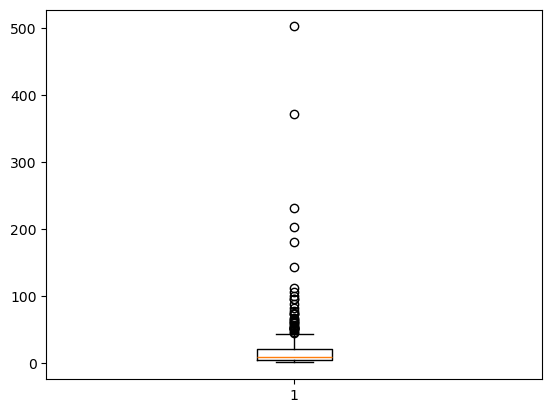

In [17]:
fig = plt.figure()
plt.boxplot(area_total_sq_mi.dropna()) # plot wont show if values are not dropped
plt.show();

Based on this boxplot dropping the values might be the correct approach in terms of handling the data because the data has so many outliers. 

In [29]:
area_total_sq_mi.count() #checking to see if values were dropped and were!

np.int64(480)